In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [3]:
train_data = pd.read_csv('train-clean.csv',delimiter=',')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29210 non-null  float64
 1   job_type                    29210 non-null  int64  
 2   marital                     29210 non-null  int64  
 3   education                   29210 non-null  int64  
 4   default                     29210 non-null  int64  
 5   balance                     29210 non-null  float64
 6   housing_loan                29210 non-null  int64  
 7   personal_loan               29210 non-null  int64  
 8   month                       29210 non-null  int64  
 9   last_contact_duration       29210 non-null  float64
 10  num_contacts_in_campaign    29210 non-null  float64
 11  num_contacts_prev_campaign  29210 non-null  int64  
 12  prev_campaign_outcome       29210 non-null  int64  
 13  term_deposit_subscribed     292

In [4]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names]
all_labels = train_data['term_deposit_subscribed']

In [5]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(training_inputs, training_classes)

KNeighborsClassifier()

In [7]:
knn.score(testing_inputs, testing_classes)

0.8940161577433932

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = knn.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6602
           1       0.38      0.16      0.23       701

    accuracy                           0.89      7303
   macro avg       0.65      0.57      0.58      7303
weighted avg       0.86      0.89      0.87      7303



In [11]:
different_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm = 'kd_tree', leaf_size=30, p=2)

# Train the classifier on the training set
different_clf.fit(training_inputs, training_classes)
new_predictions = different_clf.predict(testing_inputs)
print(classification_report(testing_classes, new_predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6602
           1       0.39      0.16      0.22       701

    accuracy                           0.90      7303
   macro avg       0.65      0.56      0.58      7303
weighted avg       0.87      0.90      0.87      7303



Text(0.5, 1.0, 'Average score: 0.8953782951044162')

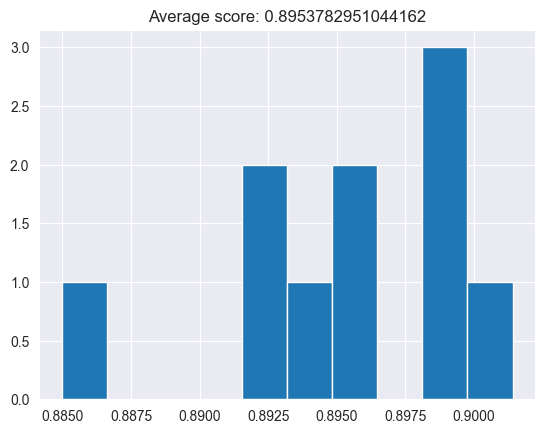

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameter_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 60],
    'p': [1, 2]}


grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=parameter_grid,
    cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))